In [15]:
import MeCab
import ngram
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
t1=MeCab.Tagger('mecabrc')
print(t1.parse('中居正広の金スマ'))
t1=MeCab.Tagger('-Ochasen')
print(t1.parse('中居正広の金スマ'))
t1=MeCab.Tagger('-Owakati')
print(t1.parse('中居正広の金スマ'))
t1=MeCab.Tagger('-Oyomi')
print(t1.parse('中居正広の金スマ'))

中居	名詞,固有名詞,人名,姓,*,*,中居,ナカイ,ナカイ
正広	名詞,固有名詞,人名,名,*,*,正広,マサヒロ,マサヒロ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
金	名詞,一般,*,*,*,*,金,キン,キン
スマ	名詞,固有名詞,一般,*,*,*,スマ,スマ,スマ
EOS

中居	ナカイ	中居	名詞-固有名詞-人名-姓		
正広	マサヒロ	正広	名詞-固有名詞-人名-名		
の	ノ	の	助詞-連体化		
金	キン	金	名詞-一般		
スマ	スマ	スマ	名詞-固有名詞-一般		
EOS

中居 正広 の 金 スマ 

ナカイマサヒロノキンスマ



In [3]:
def make_analyzed_file(input_file_name, output_file_name) -> None:
    """
    プレーンな日本語の文章ファイルを形態素解析してファイルに保存する.
    :param input_file_name プレーンな日本語の文章ファイル名
    :param output_file_name 形態素解析済みの文章ファイル名
    """
    _m = MeCab.Tagger("-Ochasen")
    with open(input_file_name, encoding='utf-8') as input_file:
        #input_file:全文
        with open(output_file_name, mode='w', encoding='utf-8') as output_file:
            output_file.write(_m.parse(input_file.read()))        

make_analyzed_file('neko.txt', 'neko.txt.mecab')

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
def tabbed_str_to_dict(tabbed_str) -> dict:
    """
    例えば「次第に   シダイニ    次第に   副詞-一般   」のようなタブ区切りで形態素を表す文字列をDict型に変換する.
    :param tabbed_str タブ区切りで形態素を表す文字列
    :return Dict型で表された形態素
    """
    elements = tabbed_str.split()#['から', 'カラ', 'から', '助詞-格助詞-一般']

    if 0 < len(elements) < 4:#['記号-空白']かNone,
        return {'surface': elements[0], 'base': '', 'pos': '', 'pos1': ''}
    else:
        return {'surface': elements[0], 'base': elements[1], 'pos': elements[2], 'pos1': elements[3]}

def morphemes_to_sentence(morphemes: list) -> list:
    """
    Dict型で表された形態素のリストを句点毎にグルーピングし、リスト化する.
    :param morphemes Dict型で表された形態素のリスト
    :return 文章のリスト
    """
    sentences = []
    sentence = []

    for morpheme in morphemes:#{'surface': '一', 'base': 'イチ', 'pos': '一', 'pos1': '名詞-数'}
        sentence.append(morpheme)
        if morpheme['pos1'] == '記号-句点':#{'surface': '。', 'base': '。', 'pos': '。', 'pos1': '記号-句点'}
            sentences.append(sentence)#[[1文ぶちこむ]]
            sentence = []#空っぽにする

    return sentences


with open('neko.txt.mecab', encoding='utf-8') as file_wrapper:
    morphemes = [tabbed_str_to_dict(line) for line in file_wrapper]

sentences = morphemes_to_sentence(morphemes)

# 結果の確認
print(morphemes[::100])
print(sentences[::100])

[{'surface': '一', 'base': 'イチ', 'pos': '一', 'pos1': '名詞-数'}, {'surface': 'は', 'base': 'ハ', 'pos': 'は', 'pos1': '助詞-係助詞'}, {'surface': '薬缶', 'base': 'ヤカン', 'pos': '薬缶', 'pos1': '名詞-一般'}, {'surface': '非常', 'base': 'ヒジョウ', 'pos': '非常', 'pos1': '名詞-形容動詞語幹'}, {'surface': 'ぬ', 'base': 'ヌ', 'pos': 'ぬ', 'pos1': '助動詞'}, {'surface': 'う', 'base': 'ウ', 'pos': 'う', 'pos1': '助動詞'}, {'surface': '決心', 'base': 'ケッシン', 'pos': '決心', 'pos1': '名詞-サ変接続'}, {'surface': '。', 'base': '。', 'pos': '。', 'pos1': '記号-句点'}, {'surface': 'と', 'base': 'ト', 'pos': 'と', 'pos1': '助詞-格助詞-引用'}, {'surface': '天', 'base': 'テン', 'pos': '天', 'pos1': '名詞-一般'}, {'surface': 'を', 'base': 'ヲ', 'pos': 'を', 'pos1': '助詞-格助詞-一般'}, {'surface': 'おっ', 'base': 'オッ', 'pos': 'おる', 'pos1': '動詞-自立'}, {'surface': 'て', 'base': 'テ', 'pos': 'て', 'pos1': '助詞-接続助詞'}, {'surface': '帯び', 'base': 'オビ', 'pos': '帯びる', 'pos1': '動詞-自立'}, {'surface': '勤まる', 'base': 'ツトマル', 'pos': '勤まる', 'pos1': '動詞-自立'}, {'surface': 'さえ', 'base': 'サエ', 'pos': 'さえ', 'pos1': '助詞-

動詞の表層形をすべて抽出せよ．
動詞の原形をすべて抽出せよ．
サ変接続の名詞をすべて抽出せよ．

In [5]:
verbs_surface = [morpheme['surface'] for morpheme in morphemes if morpheme['pos1'].find('動詞') == 0]
#.find():True→0 False→-1
verbs_base = [morpheme['base'] for morpheme in morphemes if morpheme['pos1'].find('動詞') == 0]
nouns_suru = [morpheme['surface'] for morpheme in morphemes if morpheme['pos1'] == '名詞-サ変接続']

# 結果の確認
print(verbs_surface[::100])
print(verbs_base[::100])
print(nouns_suru[::100])

['生れ', '始め', '覗い', '入れ', 'やっ', '思っ', 'いる', 'とっ', 'い', '見', '云っ', '思う', 'し', 'なっ', '食い切っ', '見', 'いろ', '泣く', '立つ', '連れ出さ', 'し', '寝かし', 'し', 'つけ', 'する', 'いる', 'せ', 'し', '参り', '写し出す', 'つづけ', '廻る', '相成り', '参り', '出来', '訳し', 'なっ', 'い', '下がっ', 'い', 'いる', 'いる', '教え', 'し', '云う', '聞える', '出来', '断っ', '喰い', 'わる', '這入っ', '捕り', '買っ', 'とっ', '寝転ん', '笑っ', '問いかける', '云う', '過ぎ', '取ら', '云う', '有る', '隠し', '引き受け', '付い', '乗り', '云う', '云う', '笑い', '見届け', 'いる', 'はす', '知っ', 'し', '窺っ', '陳べ', '引き', 'しる', 'し', '見れ', '驚き', '招い', '見る', 'いる', '登る', '見る', '棄て', 'する', '云え', '頼ま', 'あっ', 'す', 'やり', 'す', 'ある', '出し', '出', '逢っ', '続け', 'する', '起し', '云う', 'れ', '似', '飾っ', 'れる', '違い', '聞い', '教え', '着ける', '這入っ', 'くれる', 'ある', '答え', 'し', '見', '出る', 'し', '転がり', 'こしらえ', 'する', 'し', '引きずっ', '収め', 'れ', 'する', '取り合わ', 'かかり', '通っ', '廃せ', 'なっ', '云う', 'し', 'おく', '穿い', 'あろ', 'し', '云う', '書い', '叫ん', '答え', 'かかっ', '出来ん', 'かぶせ', '云う', '聞き', 'れる', 'おい', 'もっ', 'ある', 'する', '遣', '使い分け', '欠く', 'し', '過ぎる', '腐っ', '入れ', '這入り', 'おい', 'ある', '浮い', 'する', '考え', '出', 

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [23]:
def ngramed_list(lst:list=morphemes, n: int = 3) -> list:
    """
    listをNグラム化する.
    :param lst Nグラム化対象のリスト
    :param n N (デフォルトは N = 3)
    :return Nグラム化済みのリスト
    """
    index = ngram.NGram(N=n)
    return [term for term in index.ngrams(lst)]
#[{'surface': '猫', 'base': 'ネコ', 'pos': '猫', 'pos1': '名詞-一般'},
#{'surface': 'で', 'base': 'デ', 'pos': 'だ', 'pos1': '助動詞'}, 
#{'surface': 'ある', 'base': 'アル', 'pos': 'ある', 'pos1': '助動詞'}]

def is_noun_no_noun(words: list) -> bool:
    """
    3つの単語から成るリストが「名詞-の-名詞」という構成になっているかを判定する.
    :param words 3つの単語から成るリスト
    :return bool (True:「名詞-の-名詞」という構成になっている / False:「名詞-の-名詞」という構成になっていない)
    """
    return (type(words) == list) and (len(words) == 3) and \
           (words[0]['pos1'].find('名詞') == 0) and \
           (words[1]['surface'] == 'の') and \
           (words[2]['pos1'].find('名詞') == 0)


# 「名詞-の-名詞」を含むNグラムのみを抽出
noun_no_noun = [ngrams for ngrams in ngramed_list(morphemes) if is_noun_no_noun(ngrams)]
#morphemes:dict
print(noun_no_noun[::500])
# 表層を取り出して結合する
#noun_no_noun = [''.join([word['surface'] for word in ngram]) for ngram in noun_no_noun]

# 結果の確認
#print(noun_no_noun[::100])

[[{'surface': '彼', 'base': 'カレ', 'pos': '彼', 'pos1': '名詞-代名詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '掌', 'base': 'テノヒラ', 'pos': '掌', 'pos1': '名詞-一般'}], [{'surface': '在来', 'base': 'ザイライ', 'pos': '在来', 'pos1': '名詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '通り', 'base': 'トオリ', 'pos': '通り', 'pos1': '名詞-一般'}], [{'surface': '教師', 'base': 'キョウシ', 'pos': '教師', 'pos1': '名詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '所', 'base': 'トコロ', 'pos': '所', 'pos1': '名詞-非自立-副詞可能'}], [{'surface': 'さん', 'base': 'サン', 'pos': 'さん', 'pos1': '名詞-接尾-人名'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '話', 'base': 'ハナシ', 'pos': '話', 'pos1': '名詞-サ変接続'}], [{'surface': '迷亭', 'base': '迷亭', 'pos': '迷亭', 'pos1': '名詞-一般'}, {'surface': 'の', 'base': 'ノ', 'pos': 'の', 'pos1': '助詞-連体化'}, {'surface': '食い気', 'base': 'クイケ', 'pos': '食い気', 'pos1': '名詞-一般'}], [{'surface': 'これら', 'base': 'コレラ', 

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [39]:
def morphemes_to_noun_array(morphemes: list) -> list:
    """
    辞書型で表された形態素のリストを句点もしくは名詞以外の形態素で区切ってグルーピングし、リスト化する.
    :param morphemes 辞書型で表された形態素のリスト
    :return 名詞の連接のリスト
    """
    nouns_list = []
    nouns = []

    for morpheme in morphemes:
        if morpheme['pos1'].find('名詞') == 0:
            nouns.append(morpheme)
        elif (morpheme['pos1'] == '記号-句点') | (morpheme['pos1'].find('名詞') < 0):

            nouns_list.append(nouns)
            nouns = []
    return [nouns for nouns in nouns_list if len(nouns) > 1]


noun_array = [''.join([noun['surface'] for noun in nouns]) for nouns in morphemes_to_noun_array(morphemes)]

# 結果の確認
print(noun_array[::100])


['人間中', '穏かな日', '時ゃ別', '黒木綿', '麺麭', '先きの', '詩歌文章', '材料払底', '朝風呂場', '一日', '三時', '一般猫児', '七代目樽金', '寒月君', '石灯籠', '神さん', '伯父さん', '抱え車夫', '寒月君', '寒月君', '客さん', '家伝来', '——義理', '苦沙弥', '鈴木君', '実業家贔負', '陰士', '時寝返り', '草廬', 'つけよう', '庸猫', '敵中', '誂ら', '寒月君', '寒月君', '時供心', '一羽', '一結杳然', '覘いす', '三羽目', '二十世紀', '天水桶', 'あなた方', '垣巡り', '四つ目垣', '学者作家', '一隊', '以後注意', '晩書斎', 'ぴん助', '三分刈', '大詔煥発', '寸断寸断', 'すべて今', '覚禅師', '盗難品', 'ぎり返事', '独乙皇帝陛下', 'ちの中', '坊ば', '東風さん', '一人', '大変珍重', '西洋料理', 'けいまさ', '東風君', '鯱鉾町', '天井裏', 'きいきい', '秘密結婚', '喜時', '六百円', '個性保護', '埃及煙草', '月様今晩']


文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [43]:
def get_frequency(words: list) -> dict:
    """
    単語のリストを受け取って、単語をキーとして、頻度をバリューとする辞書を返す.
    :param words 単語のリスト
    :return dict 単語をキーとして、頻度をバリューとする辞書
    """
    frequency = {}
    for word in words:
        if frequency.get(word):#get:dictで使える keyがあればTrue
            frequency[word] += 1
        else:
            frequency[word] = 1

    return frequency


frequency = get_frequency([morpheme['surface'] for morpheme in morphemes[::500]])

# ソート
frequency = [(k, v) for k, v in sorted(frequency.items(), key=lambda x: x[1], reverse=True)]

# 結果の確認
print(frequency[0:20])
#print(frequency)

[('に', 19), ('の', 18), ('。', 16), ('て', 15), ('、', 13), ('を', 12), ('は', 12), ('が', 11), ('と', 10), ('で', 10), ('」', 7), ('た', 7), ('ない', 6), ('し', 6), ('だ', 5), ('ある', 5), ('う', 4), ('時', 4), ('もの', 4), ('「', 3)]


出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

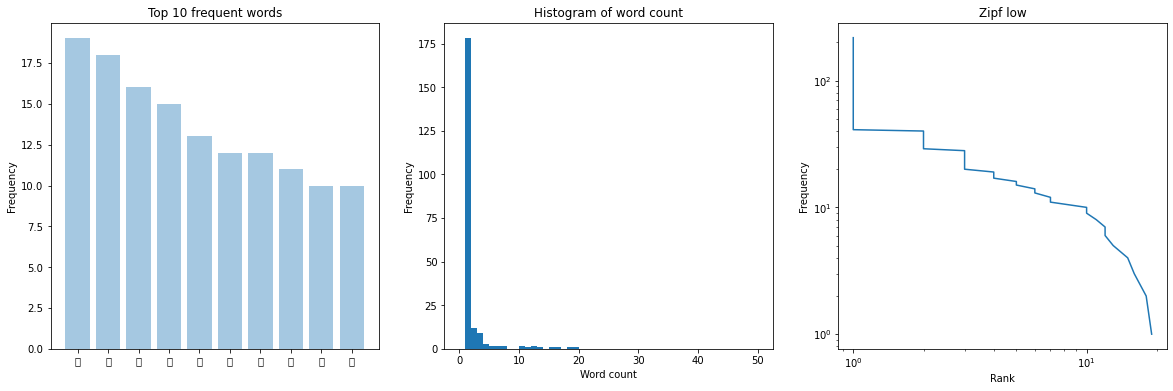

In [56]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20, 6))

# 37. 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
words = [f[0] for f in frequency[0:10]]
#f:('に', 19), f[0]:'に'
x_pos = np.arange(len(words))
#np.arange(len(words)):array([0, 1, 2, 3, 4])

#fp = FontProperties(fname=r'/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', size=14)

ax1 = fig.add_subplot(131)
ax1.bar(x_pos, [f[1] for f in frequency[0:10]], align='center', alpha=0.4)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(words)#, fontproperties=fp)
ax1.set_ylabel('Frequency')
ax1.set_title('Top 10 frequent words')

# 38. 単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．
freq = list(dict(frequency).values())#('に', 19)の19
freq.sort(reverse=True)

ax2 = fig.add_subplot(132)
ax2.hist(freq, bins=50, range=(0, 50))
ax2.set_title('Histogram of word count')
ax2.set_xlabel('Word count')
ax2.set_ylabel('Frequency')

# 39. 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．
rank = list(range(1, len(freq) + 1))

ax3 = fig.add_subplot(133)
ax3.plot(freq, rank)
ax3.set_xlabel('Rank')
ax3.set_ylabel('Frequency')
ax3.set_title('Zipf low')
ax3.set_xscale('log')
ax3.set_yscale('log')

fig.savefig('morphological_analysis.png')


In [50]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [58]:
rank = list(range(1, len(freq) + 1))
rank


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185